In [1]:
# Import required packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

# Set figure stile and size for entire notebook
sns.set_style("ticks")
plt.rcParams["figure.figsize"] = (7,4)


In [2]:
# Import Data
#data = pd.read_csv('data/data_encod.csv', index_col=[0])
data = pd.read_csv('data/data_8.csv', index_col=[0])
train=data[data.target.notnull()].reset_index(drop=True)
test=data[data.target.isna()].reset_index(drop=True)

print(f'Data: {data.shape}')
print(f'Train: {train.shape}') #(15539, 44)
print(f'Test: {test.shape}')

Data: (20574, 8)
Train: (15539, 8)
Test: (5035, 8)


In [3]:
train.head()

,location,target,mean_temp,mean_precip,mean_rel_humidity,mean_wind_dir,mean_wind_spd,mean_atmos_press
0,2,45.126304,22.299527,0.000000,0.758530,209.574655,0.677348,87.752434
1,3,79.131702,24.679063,0.007025,0.758058,177.109855,0.899208,90.429924
2,0,32.661304,24.112317,0.151767,0.712944,201.373211,1.038656,88.420931
3,0,53.850238,20.845273,1.127273,0.898326,259.973977,1.365202,88.376915
4,0,177.418750,21.870732,0.005100,0.785134,181.944779,0.729763,88.538104


In [4]:
# select only Location D
train = train[(train['location']== 3)]
train.shape

(4990, 8)

In [5]:
#fillna
train = train.fillna(train.mean())

In [6]:
train.head()

,location,target,mean_temp,mean_precip,mean_rel_humidity,mean_wind_dir,mean_wind_spd,mean_atmos_press
1,3,79.131702,24.679063,0.007025,0.758058,177.109855,0.899208,90.429924
10,3,55.638261,23.189507,0.094843,0.789361,157.660400,1.101989,90.624814
13,3,32.240851,23.151446,0.019826,0.846708,186.973246,0.770193,90.454477
15,3,72.717021,22.341529,0.169471,0.831924,184.881884,0.737514,90.607307
22,3,35.833571,22.401240,0.529488,0.844606,201.836702,0.795768,90.600544


In [7]:
columns_to_drop = ['target']
# define features and target
X = train.drop(columns_to_drop, axis=1)
y = train.target

# test train split: 
X_train, X_test, y_train, y_test = train_test_split(  
                                    X, y, test_size = 0.3, random_state = 100) 

print (f'X: {X.shape}')
print (f'y: {y.shape}')

print (f'X_train: {X_train.shape}')
print (f'y_train: {y_train.shape}')

print (f'X_test: {X_test.shape}')
print (f'y_test: {y_test.shape}')

X: (4990, 7)
y: (4990,)
X_train: (3493, 7)
y_train: (3493,)
X_test: (1497, 7)
y_test: (1497,)


## Linear Regression

In [8]:
# Scaling with standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
# Instantiate our model 
lin_reg = LinearRegression()
lin_reg_scaled = LinearRegression()
# Train the model using our data
lin_reg.fit(X_train, y_train)
lin_reg_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [10]:
# predict

y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

y_pred_train_scaled = lin_reg_scaled.predict(X_train_scaled)
y_pred_test_scaled = lin_reg_scaled.predict(X_test_scaled)

In [11]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def error_analysis(y_test, y_pred_test):
    """Generated true vs. predicted values and residual scatter plot for models

    Args:
        y_test (array): true values for y_test
        y_pred_test (array): predicted values of model for y_test
    """     
    # Calculate residuals
    residuals = y_test - y_pred_test
    
    # Plot real vs. predicted values 
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    ax[0].scatter(y_pred_test, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([-400, 350], [-400, 350], color="#193251")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    #ax[0].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[0].set_ylim((y_test.min()-40), (y_test.max()+40))
    
    ax[1].scatter(y_pred_test, residuals, color="#FF5A36", alpha=0.7)
    ax[1].plot([-400, 350], [0,0], color="#193251")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")
    #ax[1].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    #ax[1].set_ylim((residuals.min()-10), (residuals.max()+10));

In [12]:
rsme_lin_reg_train = rmse(y_train, y_pred_train )
rsme_lin_reg_test = rmse(y_test, y_pred_test )

print(f'RSME _ train: {rsme_lin_reg_train:.2f}')
print(f'RSME _ test: {rsme_lin_reg_test:.2f}')

rsme_lin_reg_train_scaled = rmse(y_train, y_pred_train_scaled )
rsme_lin_reg_test_scaled = rmse(y_test, y_pred_test_scaled )

print(f'RSME _ train_scaled: {rsme_lin_reg_train_scaled:.2f}')
print(f'RSME _ test_scaled: {rsme_lin_reg_test_scaled:.2f}')

RSME _ train: 28.08
RSME _ test: 29.84
RSME _ train_scaled: 28.08
RSME _ test_scaled: 29.84


In [13]:
print(f' max coef: {max(lin_reg.coef_)}')
print(f' min coef: {min(abs(lin_reg.coef_))}')

 max coef: 26.53796188137899
 min coef: 0.0


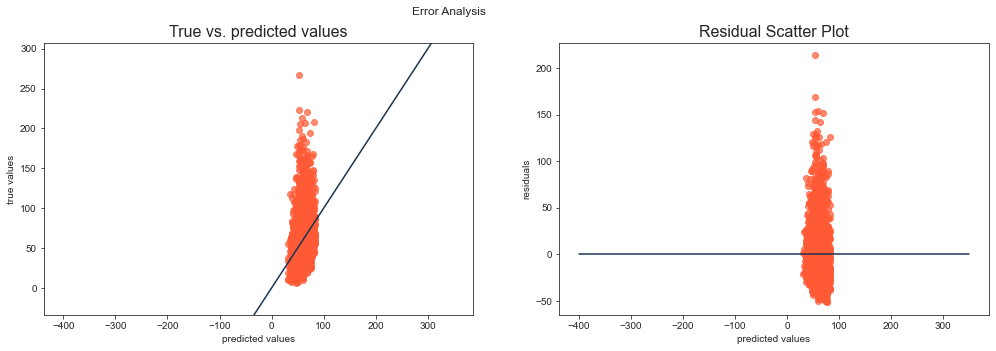

In [14]:
# error analysis train:
error_analysis(y_train, y_pred_train)

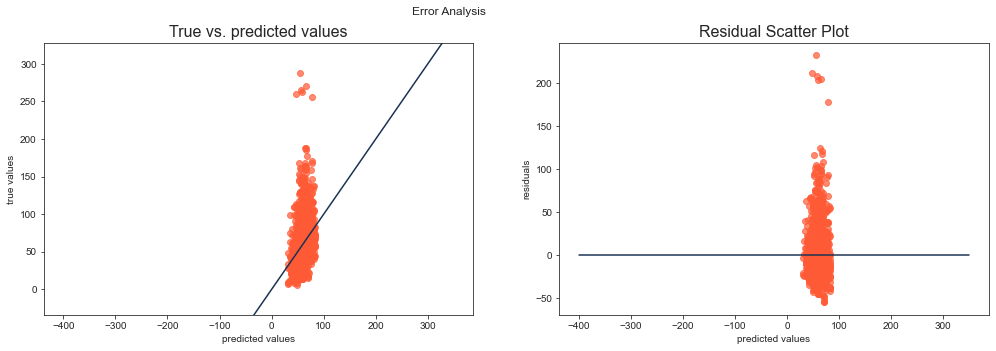

In [15]:
# error analysis test:
error_analysis(y_test, y_pred_test)

In [16]:
# error analysis test:
#error_analysis(y_test, y_pred_test_scaled)

### Lasso


RSME _ train: 29.11
RSME _ test: 31.02


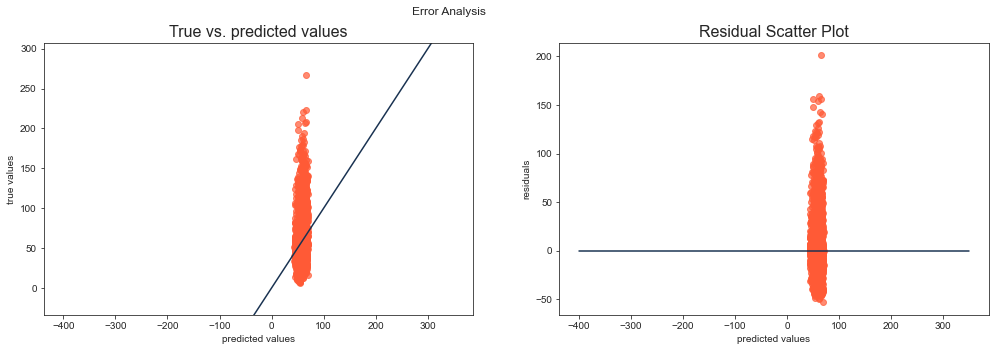

In [17]:
from sklearn.linear_model import Lasso

# Instantiate our model 
lasso_reg = Lasso()

# Train the model using our data
lasso_reg.fit(X_train, y_train)

# predict

y_pred_train = lasso_reg.predict(X_train)
y_pred_test = lasso_reg.predict(X_test)

rsme_lasso_reg_train = rmse(y_train, y_pred_train)
rsme_lasso_reg_test = rmse(y_test, y_pred_test)

print(f'RSME _ train: {rsme_lasso_reg_train:.2f}')
print(f'RSME _ test: {rsme_lasso_reg_test:.2f}')

# error analysis train:
error_analysis(y_train, y_pred_train)


In [18]:
print(f' max coef: {max(lasso_reg.coef_)}')
print(f' min coef: {min(lasso_reg.coef_)}')

 max coef: 1.9358301121392658
 min coef: 0.0


### Ridge


RSME _ train: 28.09
RSME _ test: 29.87


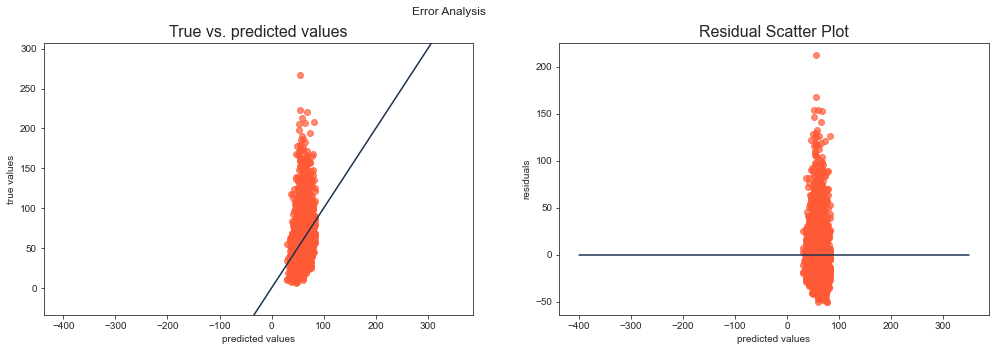

In [19]:
from sklearn.linear_model import Ridge

# Instantiate our model 
ridge_reg = Ridge()

# Train the model using our data
ridge_reg.fit(X_train, y_train)

# predict

y_pred_train = ridge_reg.predict(X_train)
y_pred_test = ridge_reg.predict(X_test)

rsme_ridge_reg_train = rmse(y_train, y_pred_train)
rsme_ridge_reg_test = rmse(y_test, y_pred_test)

print(f'RSME _ train: {rsme_ridge_reg_train:.2f}')
print(f'RSME _ test: {rsme_ridge_reg_test:.2f}')

# error analysis train:
error_analysis(y_train, y_pred_train)

### linear Regression on log y

In [20]:
y_log = np.log1p(y_train)


In [21]:
y_pred_train

array([70.34149452, 41.20869442, 49.04216042, ..., 60.01410092,
       56.5525636 , 58.49430977])

RSME _ train: 28.78
RSME _ test: 30.56


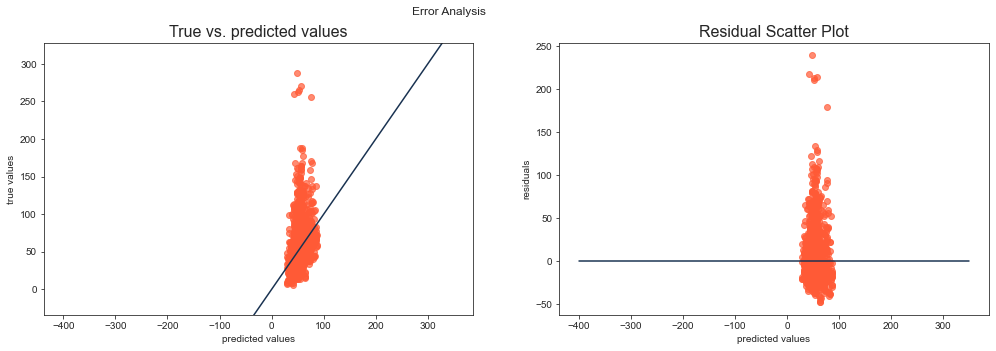

In [22]:
# Instantiate our model 
lin_log_reg = LinearRegression()

# Train the model using our data
lin_log_reg.fit(X_train, y_log) # y´= log(y+1)

# predict

y_pred_train_log = lin_log_reg.predict(X_train) # y = exp(y´) - 1
y_pred_train = np.expm1(y_pred_train_log)
y_pred_test_log = lin_log_reg.predict(X_test)
y_pred_test = np.expm1(y_pred_test_log)


rsme_lin_log_reg_train = rmse(y_train, y_pred_train )
rsme_lin_log_reg_test = rmse(y_test, y_pred_test )

print(f'RSME _ train: {rsme_lin_log_reg_train:.2f}')
print(f'RSME _ test: {rsme_lin_log_reg_test:.2f}')

# error analysis test:
error_analysis(y_test, y_pred_test)

# EDA on features

In [23]:
train.head()

,location,target,mean_temp,mean_precip,mean_rel_humidity,mean_wind_dir,mean_wind_spd,mean_atmos_press
1,3,79.131702,24.679063,0.007025,0.758058,177.109855,0.899208,90.429924
10,3,55.638261,23.189507,0.094843,0.789361,157.660400,1.101989,90.624814
13,3,32.240851,23.151446,0.019826,0.846708,186.973246,0.770193,90.454477
15,3,72.717021,22.341529,0.169471,0.831924,184.881884,0.737514,90.607307
22,3,35.833571,22.401240,0.529488,0.844606,201.836702,0.795768,90.600544


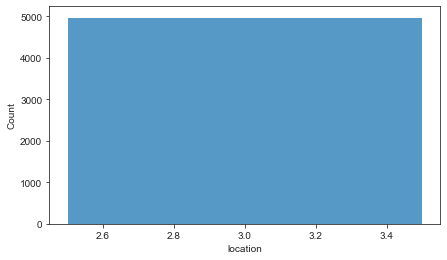

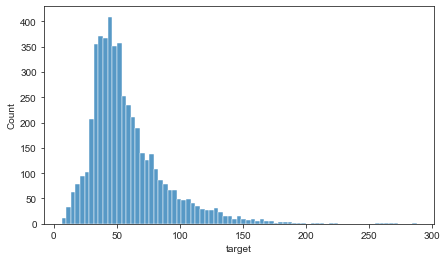

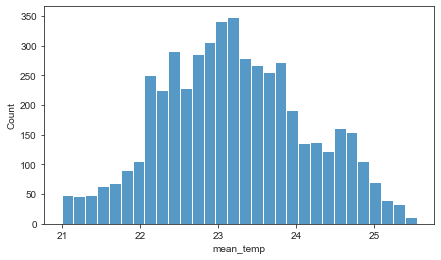

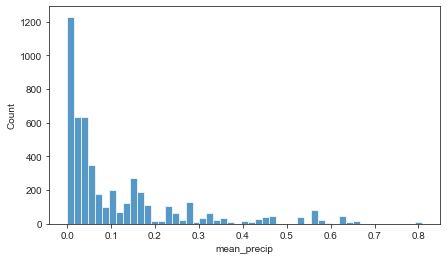

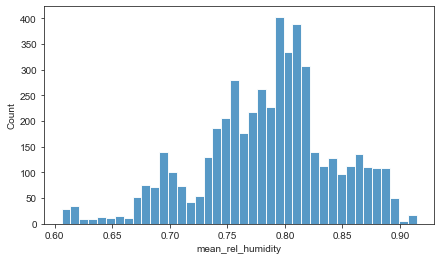

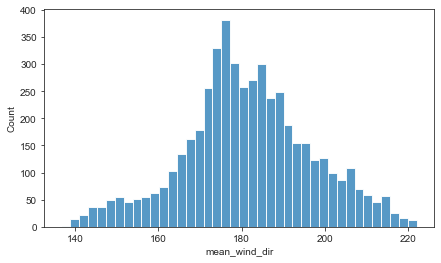

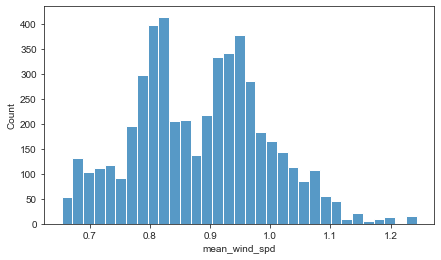

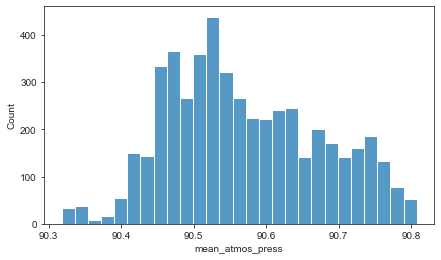

In [24]:
for i, col in enumerate(train.columns):
    plt.figure()
    sns.histplot(data = train, x = col)

convert precip to log

In [25]:
train['log_mean_precip'] = train['mean_precip'].apply(np.log1p)	

<AxesSubplot:xlabel='log_mean_precip', ylabel='Count'>

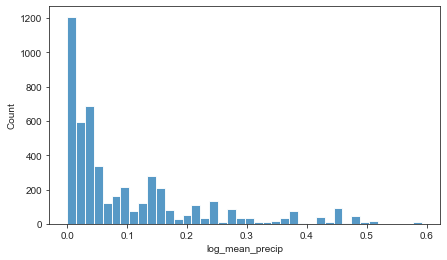

In [26]:
sns.histplot(data = train, x='log_mean_precip')

In [27]:
from scipy import special
# box - cox transform
precipitation = train['mean_precip']
#pos_precipitation = precipitation[precipitation > 0]


In [28]:
precip_boxcox1p = special.boxcox1p(precipitation, 0.01)

<AxesSubplot:xlabel='mean_precip', ylabel='Count'>

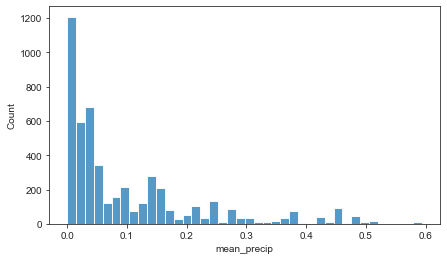

In [29]:
sns.histplot(precip_boxcox1p)

### linreg with log_mean_precip instead of mean_prec

In [30]:
columns_to_drop = ['target', 'mean_precip']
# define features and target
X = train.drop(columns_to_drop, axis=1)
y = train.target

# test train split: 
X_train, X_test, y_train, y_test = train_test_split(  
                                    X, y, test_size = 0.3, random_state = 100) 

print (f'X: {X.shape}')
print (f'y: {y.shape}')

print (f'X_train: {X_train.shape}')
print (f'y_train: {y_train.shape}')

print (f'X_test: {X_test.shape}')
print (f'y_test: {y_test.shape}')

X: (4990, 7)
y: (4990,)
X_train: (3493, 7)
y_train: (3493,)
X_test: (1497, 7)
y_test: (1497,)


In [31]:
X_train.head()

,location,mean_temp,mean_rel_humidity,mean_wind_dir,mean_wind_spd,mean_atmos_press,log_mean_precip
11299,3,23.963636,0.708059,196.573637,0.851281,90.552466,0.008116
109,3,24.263636,0.752149,156.035714,1.074477,90.464979,0.303258
9450,3,22.750826,0.843579,175.614937,0.805337,90.333519,0.071752
3567,3,22.372620,0.808041,177.387662,1.028086,90.596577,0.220655
10270,3,23.411088,0.751764,191.836646,0.865372,90.691853,0.058394


RSME _ train: 28.09
RSME _ test: 29.84


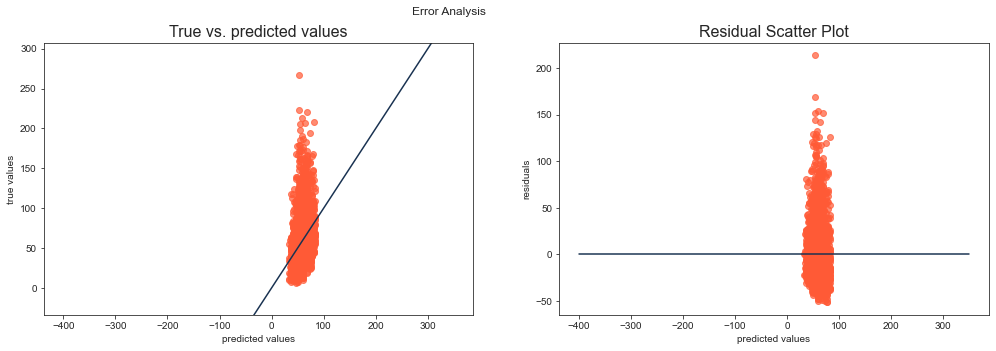

In [32]:

# Instantiate our model 
lin_reg = LinearRegression()

# Train the model using our data
lin_reg.fit(X_train, y_train)


# predict

y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

# RSME
rsme_lin_reg_train = rmse(y_train, y_pred_train )
rsme_lin_reg_test = rmse(y_test, y_pred_test )

print(f'RSME _ train: {rsme_lin_reg_train:.2f}')
print(f'RSME _ test: {rsme_lin_reg_test:.2f}')

# error analysis train:
error_analysis(y_train, y_pred_train)

### linear regression with cat precipitation

In [33]:
# data preprocessing: 
train.head()

,location,target,mean_temp,mean_precip,mean_rel_humidity,mean_wind_dir,mean_wind_spd,mean_atmos_press,log_mean_precip
1,3,79.131702,24.679063,0.007025,0.758058,177.109855,0.899208,90.429924,0.007000
10,3,55.638261,23.189507,0.094843,0.789361,157.660400,1.101989,90.624814,0.090611
13,3,32.240851,23.151446,0.019826,0.846708,186.973246,0.770193,90.454477,0.019632
15,3,72.717021,22.341529,0.169471,0.831924,184.881884,0.737514,90.607307,0.156552
22,3,35.833571,22.401240,0.529488,0.844606,201.836702,0.795768,90.600544,0.424933


In [34]:
def rain(x):
    if x == 0: return 0
    else: return 1

train['rain'] = train['mean_precip'].apply(lambda x : rain(x))
train.head()

,location,target,mean_temp,mean_precip,mean_rel_humidity,mean_wind_dir,mean_wind_spd,mean_atmos_press,log_mean_precip,rain
1,3,79.131702,24.679063,0.007025,0.758058,177.109855,0.899208,90.429924,0.007000,1
10,3,55.638261,23.189507,0.094843,0.789361,157.660400,1.101989,90.624814,0.090611,1
13,3,32.240851,23.151446,0.019826,0.846708,186.973246,0.770193,90.454477,0.019632,1
15,3,72.717021,22.341529,0.169471,0.831924,184.881884,0.737514,90.607307,0.156552,1
22,3,35.833571,22.401240,0.529488,0.844606,201.836702,0.795768,90.600544,0.424933,1


In [35]:
columns_to_drop = ['target', 'mean_precip', 'log_mean_precip']
# define features and target
X = train.drop(columns_to_drop, axis=1)
y = train.target

# test train split: 
X_train, X_test, y_train, y_test = train_test_split(  
                                    X, y, test_size = 0.3, random_state = 100) 

print (f'X: {X.shape}')
print (f'y: {y.shape}')

print (f'X_train: {X_train.shape}')
print (f'y_train: {y_train.shape}')

print (f'X_test: {X_test.shape}')
print (f'y_test: {y_test.shape}')

X: (4990, 7)
y: (4990,)
X_train: (3493, 7)
y_train: (3493,)
X_test: (1497, 7)
y_test: (1497,)


In [36]:
X_train.head()

,location,mean_temp,mean_rel_humidity,mean_wind_dir,mean_wind_spd,mean_atmos_press,rain
11299,3,23.963636,0.708059,196.573637,0.851281,90.552466,1
109,3,24.263636,0.752149,156.035714,1.074477,90.464979,1
9450,3,22.750826,0.843579,175.614937,0.805337,90.333519,1
3567,3,22.372620,0.808041,177.387662,1.028086,90.596577,1
10270,3,23.411088,0.751764,191.836646,0.865372,90.691853,1


RSME _ train: 28.02
RSME _ test: 29.85


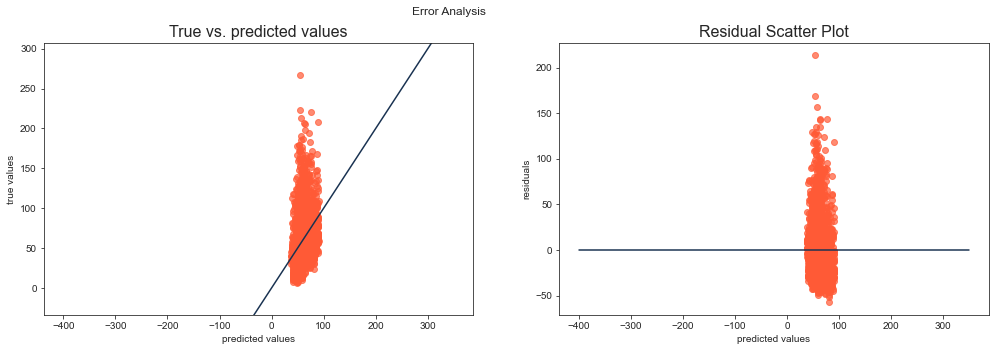

In [37]:

# Instantiate our model 
lin_reg = LinearRegression()

# Train the model using our data
lin_reg.fit(X_train, y_train)


# predict

y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

# RSME
rsme_lin_reg_train = rmse(y_train, y_pred_train )
rsme_lin_reg_test = rmse(y_test, y_pred_test )

print(f'RSME _ train: {rsme_lin_reg_train:.2f}')
print(f'RSME _ test: {rsme_lin_reg_test:.2f}')

# error analysis train:
error_analysis(y_train, y_pred_train)

In [38]:
### lasso 

RSME _ train: 28.87
RSME _ test: 30.81


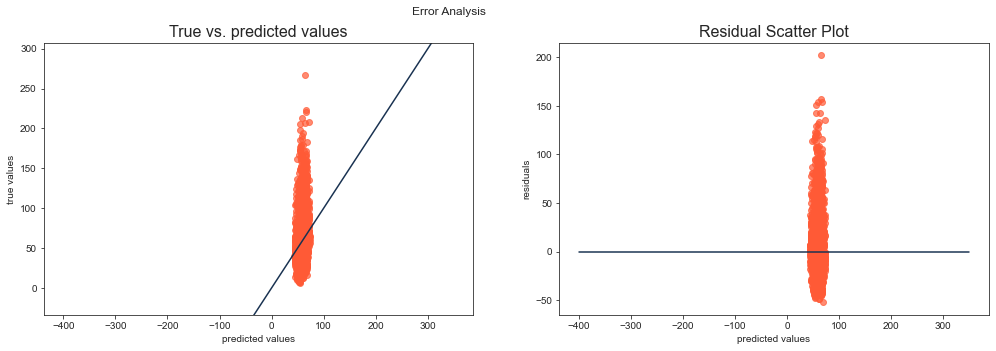

In [39]:
from sklearn.linear_model import Lasso

# Instantiate our model 
lasso_reg = Lasso()

# Train the model using our data
lasso_reg.fit(X_train, y_train)

# predict

y_pred_train = lasso_reg.predict(X_train)
y_pred_test = lasso_reg.predict(X_test)

rsme_lasso_reg_train = rmse(y_train, y_pred_train)
rsme_lasso_reg_test = rmse(y_test, y_pred_test)

print(f'RSME _ train: {rsme_lasso_reg_train:.2f}')
print(f'RSME _ test: {rsme_lasso_reg_test:.2f}')

# error analysis train:
error_analysis(y_train, y_pred_train)
